## Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Data

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')

In [ ]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


In [ ]:
df.drop(['Unnamed: 8', 'Unnamed: 9'], axis = 1, inplace = True)

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

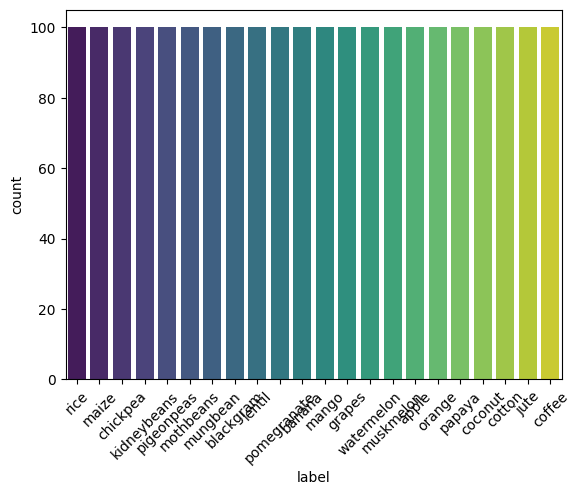

In [ ]:
sns.countplot(x = df['label'], palette = "viridis")
plt.xticks(rotation = 45)

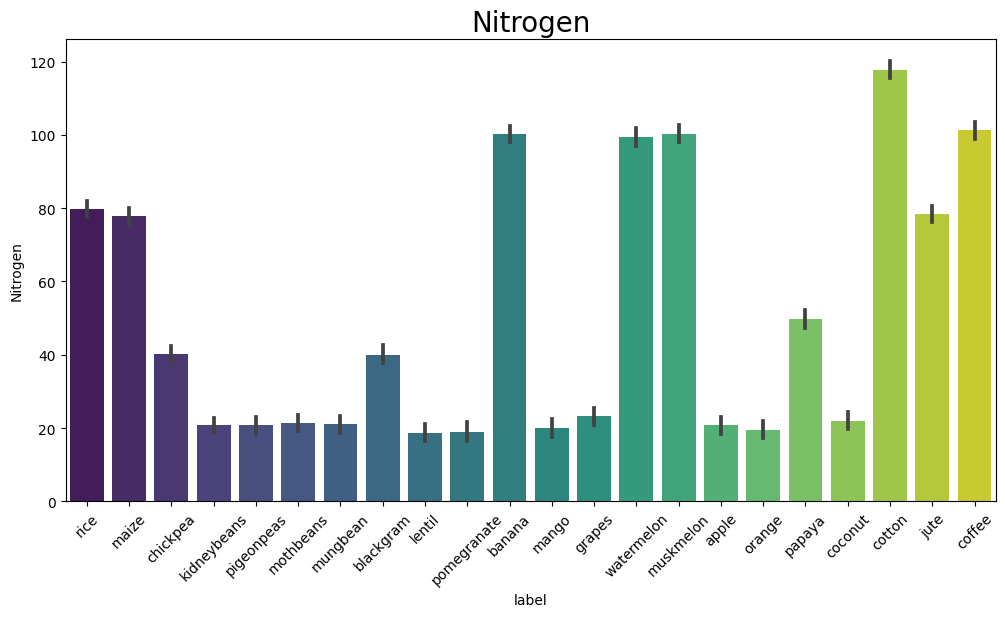

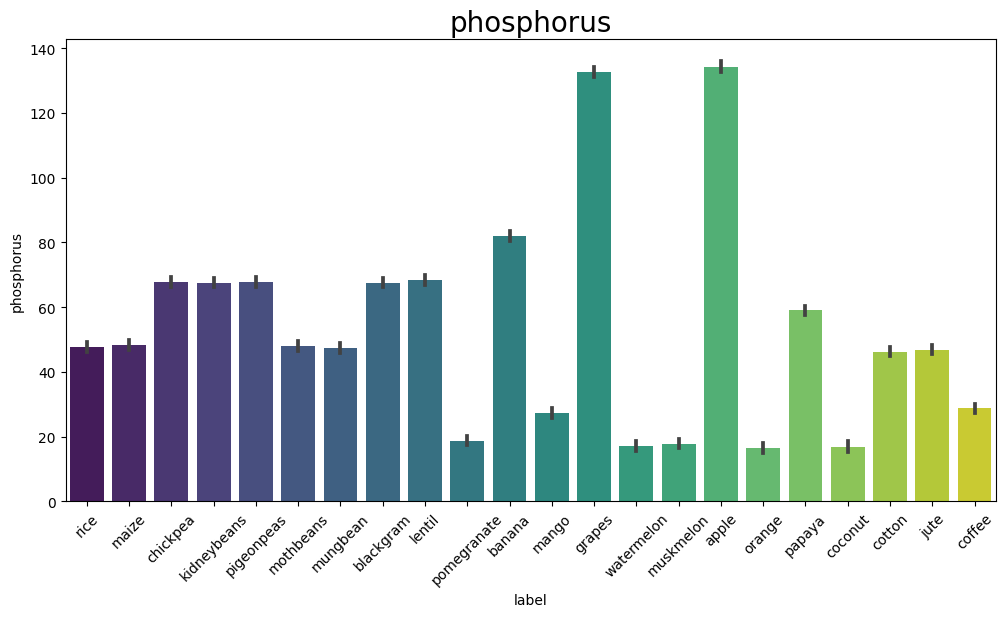

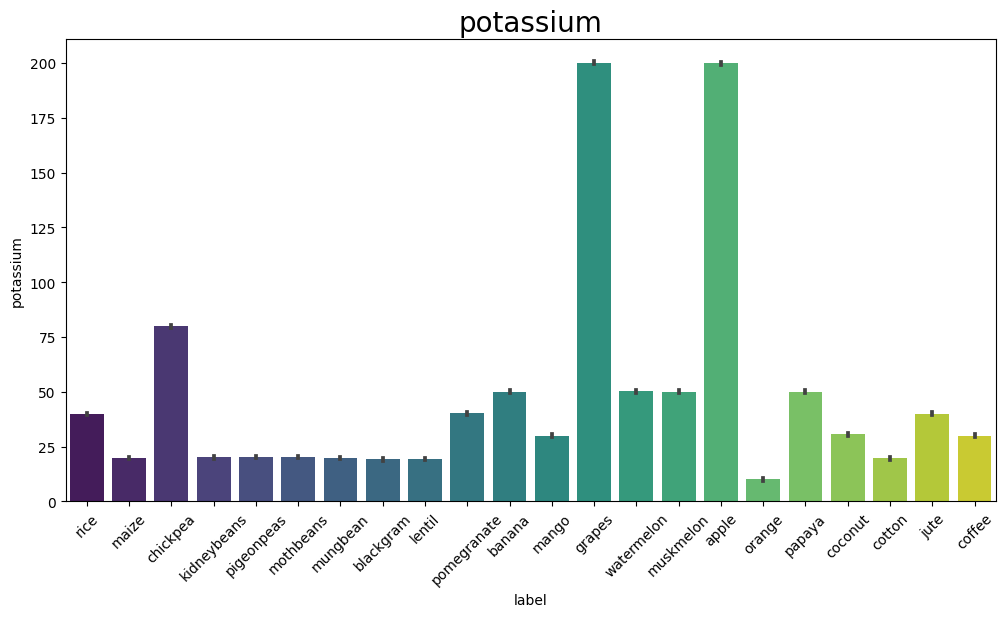

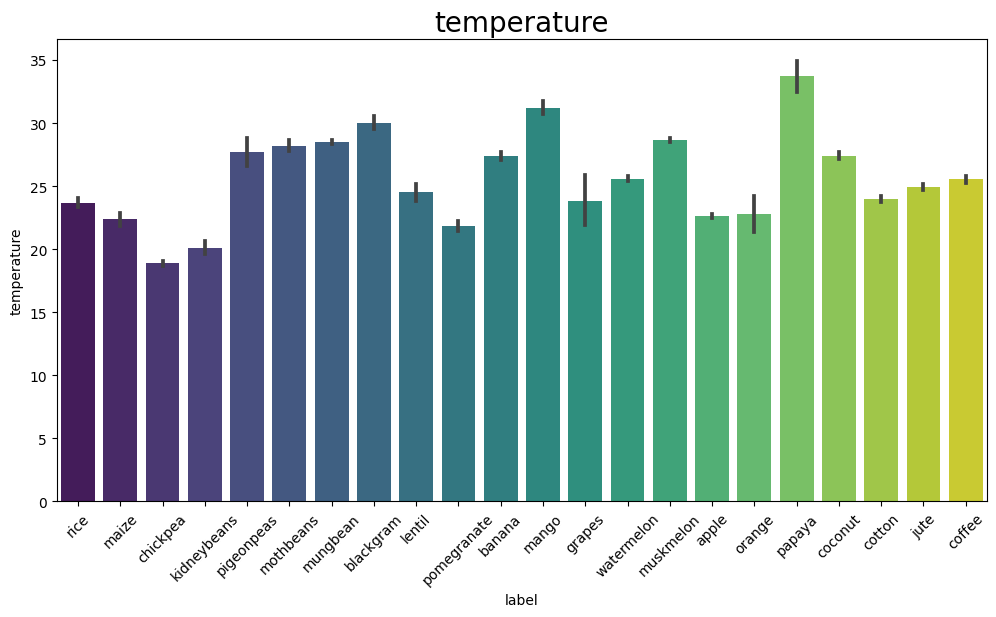

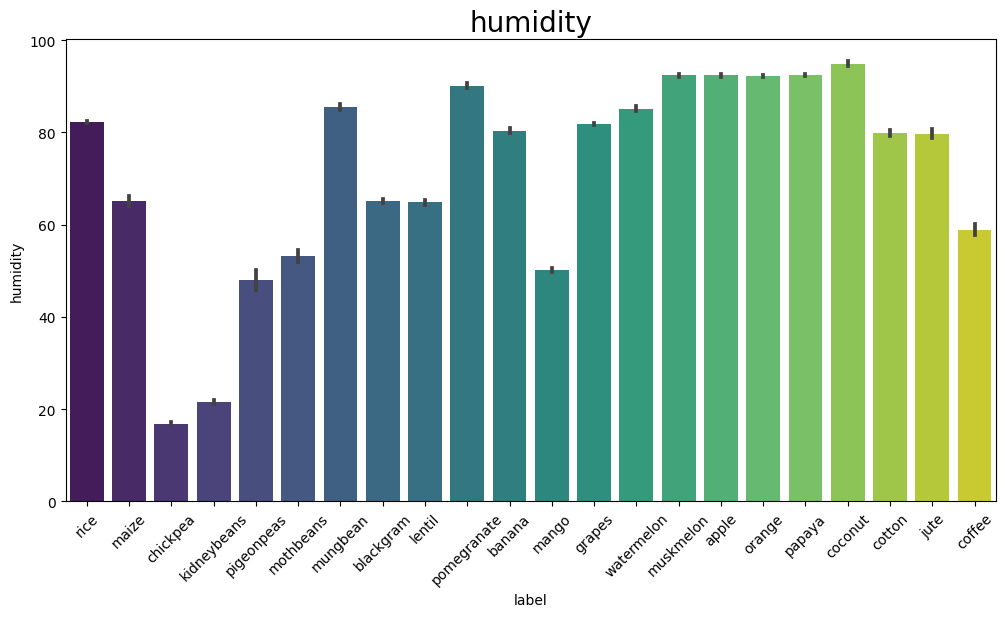

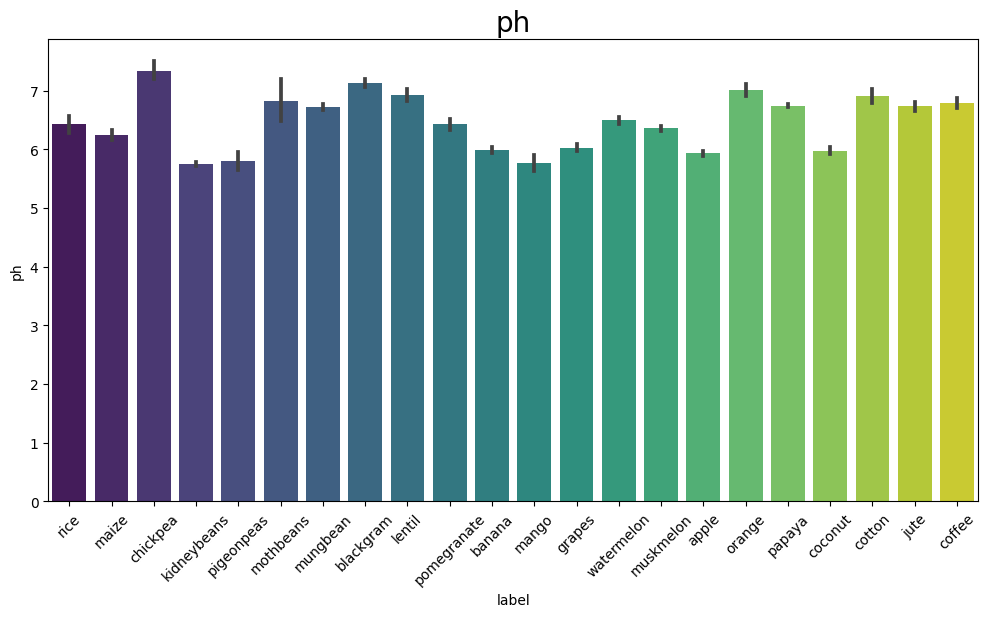

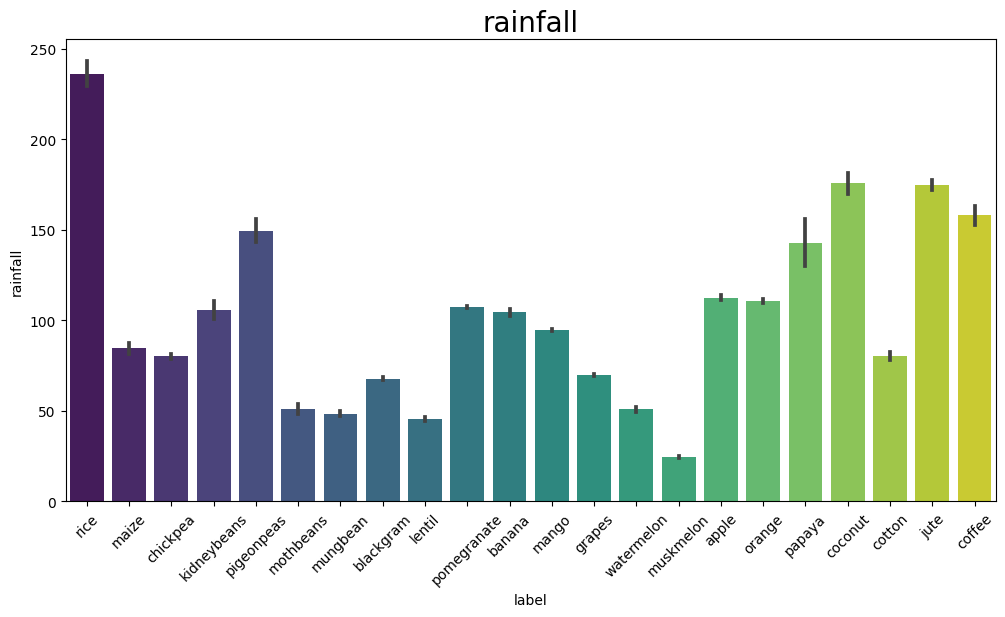

In [ ]:
columns = df.select_dtypes(include = ['float64', 'int64']).columns

for col in columns:
    plt.figure(figsize = (12,6))
    plt.title(col, fontsize = 20)
    sns.barplot(x = 'label', y = col, palette = 'viridis', data = df)
    plt.xticks(rotation = 45)

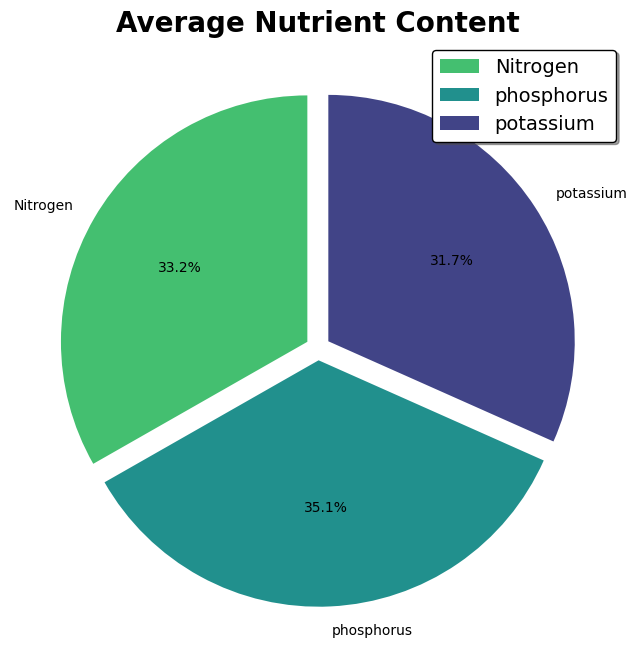

In [ ]:
colors = cm.viridis_r([0.3, 0.5, 0.8])

fig, ax = plt.subplots(figsize = (8, 8))
nutrients = ['Nitrogen', 'phosphorus', 'potassium']
sizes = [df['Nitrogen'].mean(), df['phosphorus'].mean(), df['potassium'].mean()]

explode = [0.05, 0.05, 0.05] 
ax.pie(sizes, labels = nutrients, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode)
ax.set_title('Average Nutrient Content', fontsize = 20, fontweight = 'bold')
ax.legend(fontsize = 14, loc = 'best', frameon = True, edgecolor = 'black', shadow = True)

plt.show()

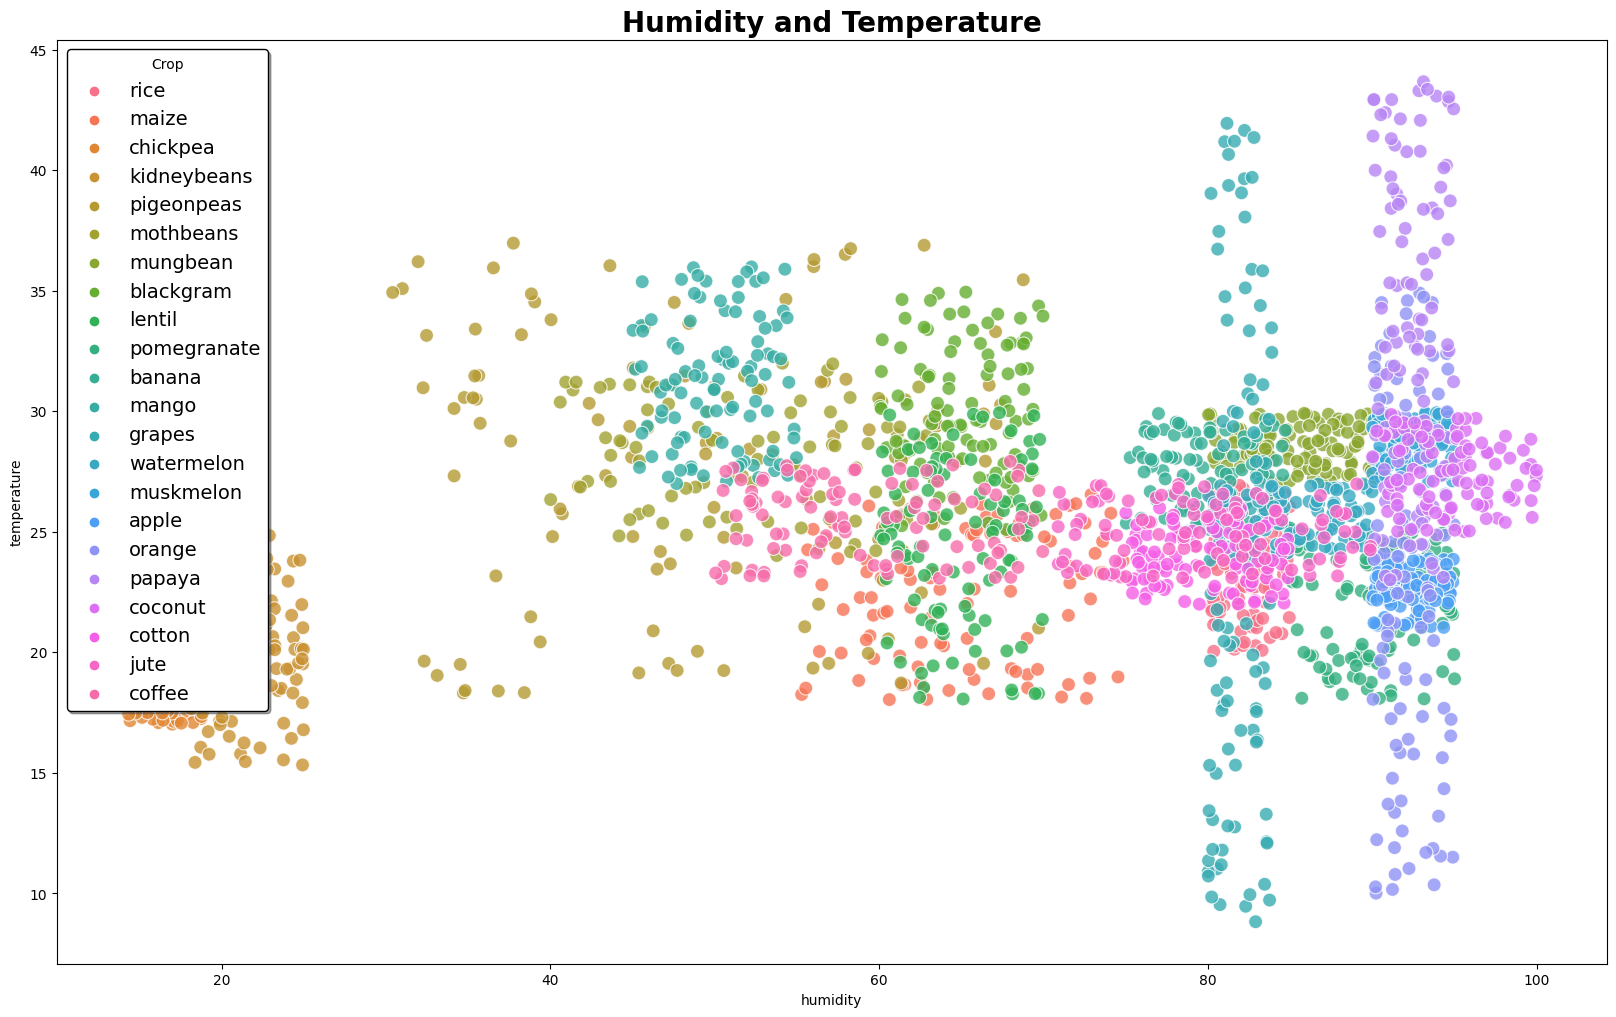

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))

sns.scatterplot(x = "humidity", y = "temperature", hue = "label", data = df, s = 100, alpha = 0.8)
ax.set_title("Humidity and Temperature", fontsize=20, fontweight = 'bold')
ax.legend(title = "Crop", fontsize = 14, loc = 'upper left', frameon = True, edgecolor = 'black', shadow = True)

plt.show()

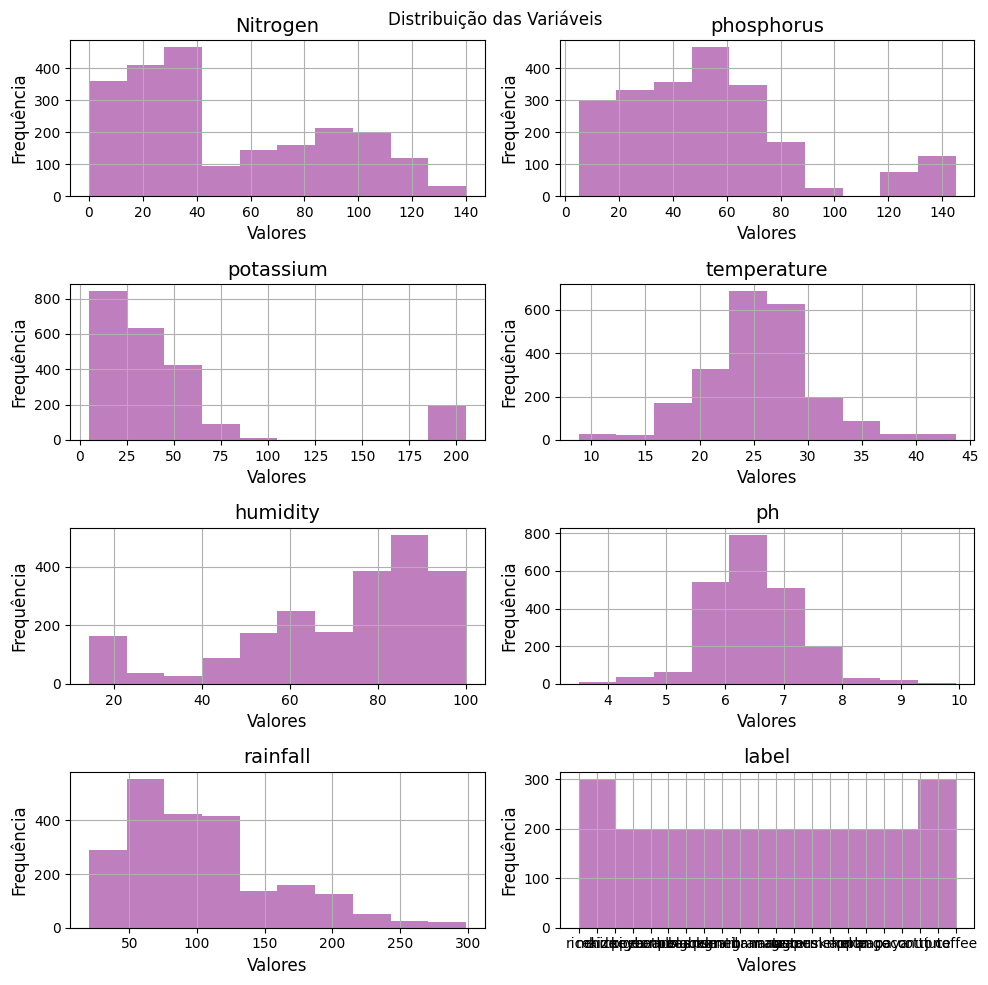

In [ ]:
list_columns = list(df.columns)

fig, axs = plt.subplots(4, 2, figsize = (10, 10))
fig.suptitle('Distribuição das Variáveis')

for i, column in enumerate(list_columns):
    ax = axs.flat[i]
    ax.hist(df[column], color='purple', alpha = 0.5)
    ax.set_title(column, fontsize = 14)
    ax.set_xlabel('Valores', fontsize = 12)
    ax.set_ylabel('Frequência', fontsize = 12)
    ax.grid(True)
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

<ipython-input-14-acda9a3b40ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


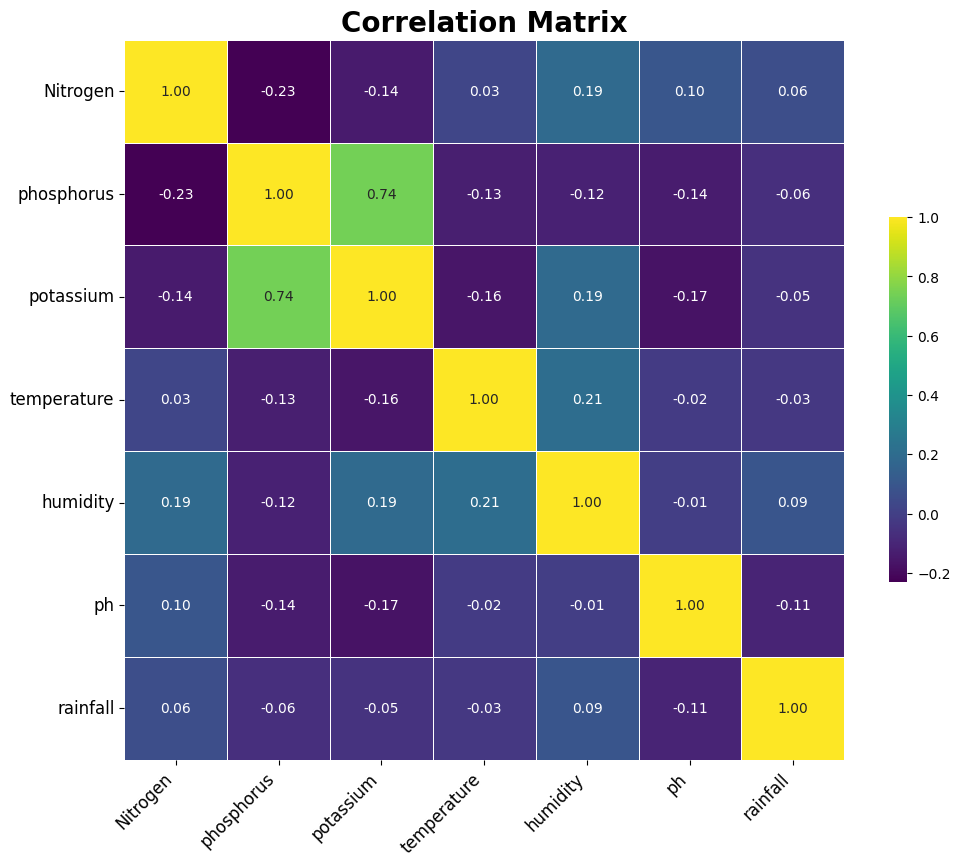

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (12, 10))
heatmap = sns.heatmap(corr_matrix, cmap = "viridis", annot = True, 
                      fmt = ".2f", square = True, linewidths = .5, cbar_kws = {"shrink": .5}, ax = ax)

heatmap.set_title("Correlation Matrix", fontsize=20, fontweight = 'bold')
plt.subplots_adjust(left = 0.15, bottom = 0.15)
ax.tick_params(labelsize = 12)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 45, ha = 'right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, ha = 'right')
plt.show()

## Split Train/Test

In [ ]:
X = df.drop('label', axis = 1)
y = df['label']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Data balancing

In [ ]:
smt = SMOTE(random_state = 0)
xtrain_res, ytrain_res = smt.fit_resample(xtrain, ytrain)

print(f'Distribution before balancing:\n{ytrain.value_counts()}')
print()
print(f'Distribution after balancing:\n{ytrain_res.value_counts()}')

Distribution before balancing:
coconut        85
cotton         84
lentil         83
watermelon     83
mungbean       83
coffee         83
maize          82
apple          82
grapes         82
banana         82
kidneybeans    80
jute           79
papaya         79
mango          79
pigeonpeas     78
blackgram      78
pomegranate    77
orange         77
muskmelon      77
chickpea       77
mothbeans      75
rice           75
Name: label, dtype: int64

Distribution after balancing:
apple          85
jute           85
cotton         85
rice           85
mango          85
coconut        85
papaya         85
mothbeans      85
muskmelon      85
pigeonpeas     85
orange         85
blackgram      85
mungbean       85
coffee         85
maize          85
grapes         85
kidneybeans    85
pomegranate    85
banana         85
chickpea       85
watermelon     85
lentil         85
Name: label, dtype: int64


## Training

In [ ]:
rf = RandomForestClassifier(max_features = 'auto', min_samples_leaf = 1, 
                       min_samples_split = 2, n_jobs = -1, random_state = 0)

rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


## Results

In [ ]:
accuracy = accuracy_score(ytest, pred)
print('Acurácia: %f' % accuracy)

Acurácia: 0.997727


In [ ]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
input_data = (70,41,43,20.87,82.0,7.2,200)
import numpy as np
#changing the i/p data into numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we're predicting for one instance that means we're reshaping bcoz in data there are 768 examples but we're 
#taking one example as an input_data for prediction if we don't mention the reshape then model expects the 768 data points or
#768 values but we're taking one this will make confusion to the model if we don't use the reshape

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print(input_data_reshaped)

prediction = rf.predict(input_data_reshaped)

print(prediction)

[[ 70.    41.    43.    20.87  82.     7.2  200.  ]]
['rice']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


_